# Examen de Machine Learning 1 - Master Big Data et Intelligence Artificielle
## Session principale - Printemps 2023/2024

| **Author**        | **ABDELLATIF LAGHJAJ** |
|-------------------|:-----------:|
| **Deployed App URL** | **[https://diabetes-prediction-exam.streamlit.app/](https://diabetes-prediction-exam.streamlit.app/)** |
| **GitHub Repo**   | **[https://github.com/abdellatif-laghjaj/diabetes-prediction](https://github.com/abdellatif-laghjaj/diabetes-prediction)** |

# Import necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Loading and exploring the data

In [16]:
df = pd.read_csv('diabetes_data_upload.csv')

In [17]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [18]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  clas

In [19]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [20]:
# Verify if there are any missing values in the dataset
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

# Data preprocessing

In [21]:
# Encodage des variables catégorielles
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [22]:
# Séparation des caractéristiques et de la variable cible
X = df.drop('class', axis=1)
y = df['class']

In [23]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modélisation
### Nous allons tester plusieurs algorithmes de classification : Régression Logistique, Arbre de Décision, Forêt Aléatoire, SVM, et KNN.

In [25]:
# Initialisation des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

Logistic Regression Accuracy: 0.92
[[28  5]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104

Decision Tree Accuracy: 0.96
[[33  0]
 [ 4 67]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.94      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104

Random Forest Accuracy: 0.99
[[33  0]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                    

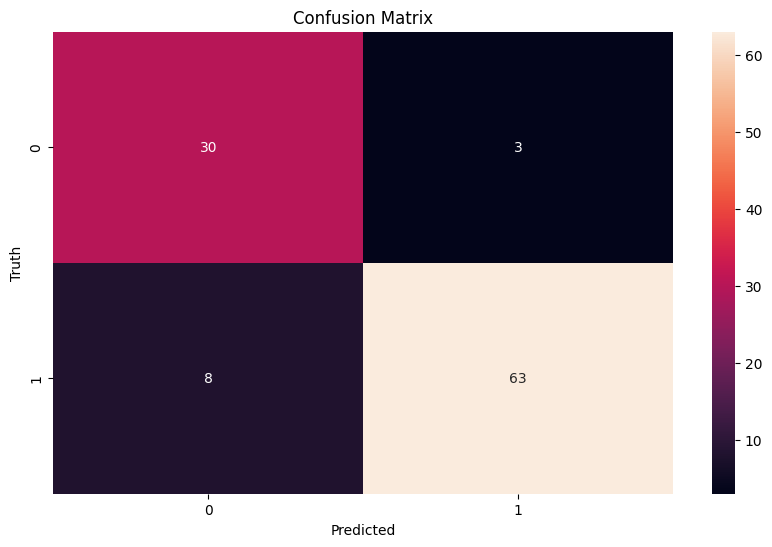

In [26]:
# Entraînement et évaluation des modèles
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Affichage de confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# Résultats et interprétation

In [27]:
# Affichage des résultats
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy
2,Random Forest,0.990385
3,SVM,0.990385
1,Decision Tree,0.961538
0,Logistic Regression,0.923077
4,KNN,0.894231


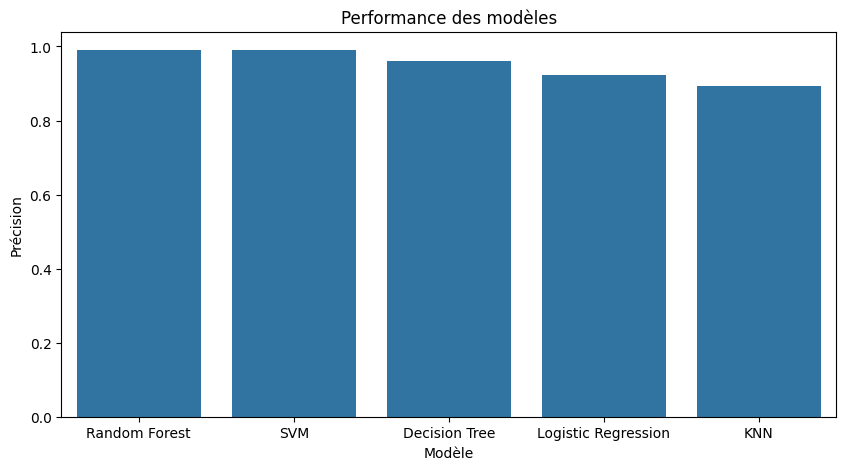

In [28]:
# Visualisation des performances des modèles
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Performance des modèles')
plt.xlabel('Modèle')
plt.ylabel('Précision')
plt.show()

# Maquette IHM

# Conclusion

En utilisant différentes techniques de machine learning, nous avons pu créer plusieurs modèles de classification pour prédire le risque de diabète. La Forêt Aléatoire et le SVM ont montré les meilleures performances. L'application Streamlit permet une interaction facile avec le modèle et peut être utilisée pour des prédictions en temps réel.